### Kaplan-Meier (시간에 따른 생존확률의 추이) 

> 1. 무슨 캐릭터를 할 때 생존 확률이 높은가?

In [30]:
import pandas as pd

label = pd.read_csv("c:/vscode/미니프로젝트/2_분류_프로젝트/data/train_label.csv")
df = label
df = df.drop(['amount_spent'], axis=1)
df = df.sort_values('acc_id')

combat = pd.read_csv('c:/vscode/미니프로젝트/2_분류_프로젝트/data/train_combat.csv')
combat

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,1,13809,54861,ap,2,13,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,1,13809,256332,ap,2,13,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,1,13809,307293,ap,3,14,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,1,13809,374964,ap,7,16,0.0,0.0,0.0,0.000000,0.0,0.112612,0.098129
4,1,13809,117917,ap,2,11,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574666,10,21604,179760,az,3,15,0.0,0.0,0.0,4.797278,0.0,0.000000,0.098129
1574667,10,73622,36541,az,3,15,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1574668,10,104426,23384,ai,7,6,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1574669,10,85674,111923,an,4,16,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [34]:
combat1 = combat[['acc_id','char_id','class']]
combat1

,acc_id,char_id,class
0,13809,54861,2
1,13809,256332,2
2,13809,307293,3
3,13809,374964,7
4,13809,117917,2
...,...,...,...
1574666,21604,179760,3
1574667,73622,36541,3
1574668,104426,23384,7
1574669,85674,111923,4


In [35]:
combat1.drop_duplicates(subset='char_id', keep='first', inplace=True)
combat1

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8068\2392714083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combat1.drop_duplicates(subset='char_id', keep='first', inplace=True)


,acc_id,char_id,class
0,13809,54861,2
1,13809,256332,2
2,13809,307293,3
3,13809,374964,7
4,13809,117917,2
...,...,...,...
1574054,7335,318703,7
1574073,89427,315605,5
1574329,42203,308766,5
1574431,111661,76725,2


In [36]:
# 생존 데이터 합치기
class_sur = combat1.merge(df, how='left', on='acc_id')
class_sur

,acc_id,char_id,class,survival_time,survive
0,13809,54861,2,64,1
1,13809,256332,2,64,1
2,13809,307293,3,64,1
3,13809,374964,7,64,1
4,13809,117917,2,64,1
...,...,...,...,...,...
149242,7335,318703,7,39,0
149243,89427,315605,5,25,0
149244,42203,308766,5,31,0
149245,111661,76725,2,64,1


In [37]:
class_sur.fillna(0, inplace=True)
class_sur

,acc_id,char_id,class,survival_time,survive
0,13809,54861,2,64,1
1,13809,256332,2,64,1
2,13809,307293,3,64,1
3,13809,374964,7,64,1
4,13809,117917,2,64,1
...,...,...,...,...,...
149242,7335,318703,7,39,0
149243,89427,315605,5,25,0
149244,42203,308766,5,31,0
149245,111661,76725,2,64,1


In [38]:
class_sur.loc[class_sur['class']==0, 'class']=8
class_sur

,acc_id,char_id,class,survival_time,survive
0,13809,54861,2,64,1
1,13809,256332,2,64,1
2,13809,307293,3,64,1
3,13809,374964,7,64,1
4,13809,117917,2,64,1
...,...,...,...,...,...
149242,7335,318703,7,39,0
149243,89427,315605,5,25,0
149244,42203,308766,5,31,0
149245,111661,76725,2,64,1


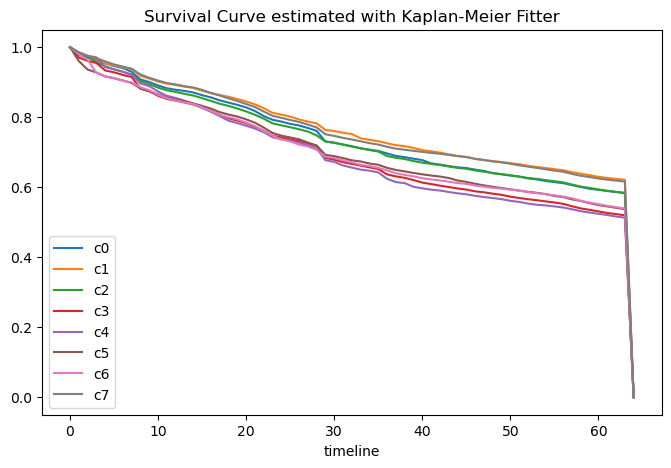

In [39]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

c0 = (class_sur['class'] == 8)
c1 = (class_sur['class'] == 1)
c2 = (class_sur['class'] == 2)
c3 = (class_sur['class'] == 3)
c4 = (class_sur['class'] == 4)
c5 = (class_sur['class'] == 5)
c6 = (class_sur['class'] == 6)
c7 = (class_sur['class'] == 7)

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=class_sur[c0]['survival_time'], event_observed=class_sur[c0]['class'], label='c0')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=class_sur[c1]['survival_time'], event_observed=class_sur[c1]['class'], label='c1')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=class_sur[c2]['survival_time'], event_observed=class_sur[c2]['class'], label='c2')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=class_sur[c3]['survival_time'], event_observed=class_sur[c3]['class'], label='c3')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=class_sur[c4]['survival_time'], event_observed=class_sur[c4]['class'], label='c4')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=class_sur[c5]['survival_time'], event_observed=class_sur[c5]['class'], label='c5')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=class_sur[c6]['survival_time'], event_observed=class_sur[c6]['class'], label='c6')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=class_sur[c7]['survival_time'], event_observed=class_sur[c7]['class'], label='c7')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

# kmf.plot_survival_function(figsize=(8,5))
# plt.title('Survival Curve estimated with Kaplan-Meier Fitter with confidence intervals')
# plt.show()

In [ ]:
# 결론
# 1,7,2,0,6,5,3,4 순으로 생존률 높음
# c0은 어디감? --> 그룹 데이터 안에 '0'이 들어간 자료를 넣으면 안됨,,,

In [34]:
# 시간 제외 단순 생존만으로 구하기
class_sur1 = class_sur[['class', 'survive']]

In [49]:
# 직업별 생존률(중복)
result = class_sur1.groupby('class')['survive'].sum().reset_index()

result2 = class_sur.groupby('class')['survive'].count().reset_index()
result2 = result2.rename(columns=({'survive':'cnt'}))

result = result.merge(result2, on='class', how='left')
result['survive/cnt(%)'] = round(result['survive']/result['cnt']*100)
result
# 위에 그래프랑 순서 일치
# 1,7,2,0,6,5,3,4 순으로 생존률 높음

,class,survive,cnt,survive/cnt(%)
0,0,82448,129102,64.0
1,1,233285,328006,71.0
2,2,171292,268120,64.0
3,3,135403,246501,55.0
4,4,112907,212877,53.0
5,5,76592,132749,58.0
6,6,24788,41375,60.0
7,7,147347,215941,68.0


> 몇 개의 캐릭터를 가지고 있는게 생존에 유리할까?

In [42]:
char_count = combat1.groupby('acc_id')['char_id'].count().reset_index()
char_count

,acc_id,char_id
0,2,1
1,5,3
2,8,7
3,17,4
4,20,2
...,...,...
39957,130463,2
39958,130468,6
39959,130469,5
39960,130470,7


In [43]:
# 생존 데이터 합치기
class_sur1 = char_count.merge(df, how='left', on='acc_id')
class_sur1

,acc_id,char_id,survival_time,survive
0,2,1,64,1
1,5,3,60,0
2,8,7,64,1
3,17,4,64,1
4,20,2,64,1
...,...,...,...,...
39957,130463,2,64,1
39958,130468,6,1,0
39959,130469,5,64,1
39960,130470,7,64,1


In [50]:
class_sur1['char_id'].describe()

count    39962.000000
mean         3.734723
std          4.243793
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max        229.000000
Name: char_id, dtype: float64

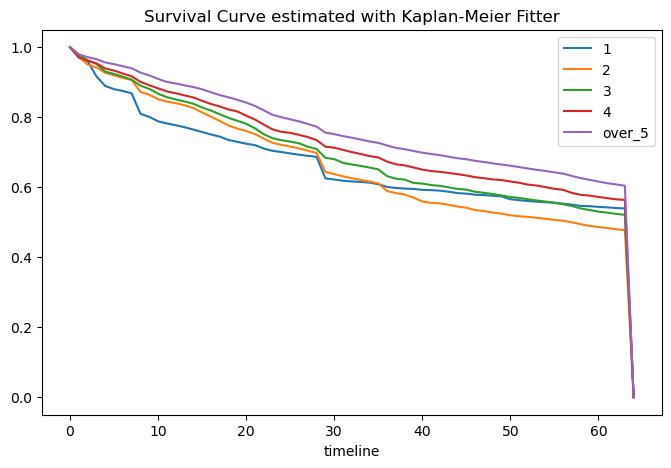

In [51]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

c0 = (class_sur1['char_id'] == 1)
c1 = (class_sur1['char_id'] == 2)
c2 = (class_sur1['char_id'] == 3)
c3 = (class_sur1['char_id'] == 4)
c4 = (class_sur1['char_id'] >= 5)

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=class_sur1[c0]['survival_time'], event_observed=class_sur1[c0]['char_id'], label='1')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=class_sur1[c1]['survival_time'], event_observed=class_sur1[c1]['char_id'], label='2')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=class_sur1[c2]['survival_time'], event_observed=class_sur1[c2]['char_id'], label='3')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=class_sur1[c3]['survival_time'], event_observed=class_sur1[c3]['char_id'], label='4')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=class_sur1[c4]['survival_time'], event_observed=class_sur1[c4]['char_id'], label='over_5')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

In [ ]:
# 5,4,1,3,2

> 다른거

In [51]:
onehot = pd.get_dummies(class_sur['class'])
onehot.columns = ['0','1','2','3','4','5','6','7']
onehot

,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1574666,0,0,0,1,0,0,0,0
1574667,0,0,0,1,0,0,0,0
1574668,0,0,0,0,0,0,0,1
1574669,0,0,0,0,1,0,0,0


In [58]:
df = onehot
surv = class_sur['survive']
df['survive'] = surv
df

,0,1,2,3,4,5,6,7,survive
0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1574666,0,0,0,1,0,0,0,0,0
1574667,0,0,0,1,0,0,0,0,0
1574668,0,0,0,0,0,0,0,1,0
1574669,0,0,0,0,1,0,0,0,0


In [61]:
train_cols = df.columns[0:8]
X = df[train_cols]
y = df['survive']

In [62]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['survive'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['survive'].value_counts()

0    590609
1    590609
Name: survive, dtype: int64

In [63]:
X=df_samp[train_cols]
y=df_samp["survive"]

In [64]:
from sklearn.model_selection import train_test_split

#학습용, 검증용 구분
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0)

In [65]:
import statsmodels.api as sm
model= sm.OLS(y,X)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                survive   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3434.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:21:38   Log-Likelihood:            -8.4542e+05
No. Observations:             1181218   AIC:                         1.691e+06
Df Residuals:                 1181210   BIC:                         1.691e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.5143      0.002    322.036      0.0

In [66]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0, max_iter=1000)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.562881095141242
0.5620544860398571


> 2. 결제금액에 따른 생존확률

In [2]:
import pandas as pd

df= pd.read_csv("c:/vscode/미니프로젝트/2_분류_프로젝트/data/total_train.csv")
df = df[['acc_id','amount_spent']]
df1 = pd.read_csv("c:/vscode/미니프로젝트/2_분류_프로젝트/data/train_label.csv")
df1 = df1[['acc_id','survival_time','survive']]
df = df.merge(df1, on='acc_id', how='left')
df

,acc_id,amount_spent,survival_time,survive
0,2,0.000000,64,1
1,5,0.000000,60,0
2,8,1.404644,64,1
3,17,0.000000,64,1
4,20,0.896531,64,1
...,...,...,...,...
39995,130463,0.000000,64,1
39996,130468,0.000000,1,0
39997,130469,0.360255,64,1
39998,130470,1.392909,64,1


In [42]:
# df.to_csv('c:/vscode/미니프로젝트/2_분류_프로젝트/걸제금액_평균컬럼추가.csv')

In [25]:
df2 = pd.read_csv('c:/vscode/미니프로젝트/2_분류_프로젝트/걸제금액_평균컬럼추가.csv')
df2

,acc_id,amount_spent,survival_time,survive,spent_label
0,2,0.000000,64,1,0
1,5,0.000000,60,0,0
2,8,1.404644,64,1,1
3,17,0.000000,64,1,0
4,20,0.896531,64,1,0
...,...,...,...,...,...
39995,130463,0.000000,64,1,0
39996,130468,0.000000,1,0,0
39997,130469,0.360255,64,1,0
39998,130470,1.392909,64,1,1


In [26]:
df2.loc[df2['spent_label']==0, 'spent_label']=2
df2

,acc_id,amount_spent,survival_time,survive,spent_label
0,2,0.000000,64,1,2
1,5,0.000000,60,0,2
2,8,1.404644,64,1,1
3,17,0.000000,64,1,2
4,20,0.896531,64,1,2
...,...,...,...,...,...
39995,130463,0.000000,64,1,2
39996,130468,0.000000,1,0,2
39997,130469,0.360255,64,1,2
39998,130470,1.392909,64,1,1


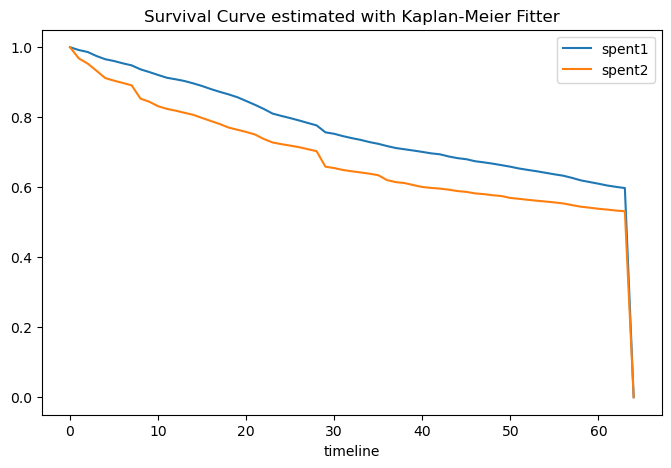

In [27]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

spent1 = (df2['spent_label'] == 1)
spent2 = (df2['spent_label'] == 2)

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df2[spent1]['survival_time'], event_observed=df2[spent1]['spent_label'], label='spent1')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df2[spent2]['survival_time'], event_observed=df2[spent2]['spent_label'], label='spent2')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

In [17]:
result = df2[['spent_label', 'survive']]
result = result.groupby('spent_label')['survive'].sum().reset_index()

result2 = df2[['spent_label', 'acc_id']]
result2 = result2.groupby('spent_label')['acc_id'].count().reset_index()

result = result.merge(result2, on='spent_label', how='left')
result = result.rename(columns={'acc_id':'total'})

result['survive/total(%)'] = round(result['survive']/result['total']*100)
result

,spent_label,survive,total,survive/total(%)
0,0,15326,28839,53.0
1,1,6670,11161,60.0


### 2. 시간 상관 없는 분석

> 혈맹원 수와 생존율

In [53]:
import pandas as pd
df = pd.read_csv("c:/vscode/미니프로젝트/2_분류_프로젝트/data/total_train.csv")
df.head(5)

,acc_id,survive,amount_spent,sell_cnt,buy_cnt,playtime,npc_kill,solo_exp,party_exp,quest_exp,...,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt_y,random_defender_cnt_y,same_pledge_cnt_y,temp_cnt_y,etc_cnt_y,combat_play_time,non_combat_play_time
0,2,1,0.000000,35.0,1.0,91.533663,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0,0.000000,0.0,10.0,6.116132,3.236452,2.155434,0.695285,0.111055,...,5.557755,1.587930,0.000000,1.936569,0.929907,0.000000,2.570959,0.814001,5.097608,0.004402
2,8,1,1.404644,7.0,10.0,18.797802,31.172609,31.489136,0.000000,1.561055,...,201.306223,58.031626,2.717332,33.631748,21.745527,29.441536,92.455650,61.354404,136.879854,0.033823
3,17,1,0.000000,33.0,57.0,28.464708,30.456852,9.255848,8.823094,2.322365,...,71.312495,21.689681,0.486279,9.230979,10.872764,1.591434,36.784494,12.514373,65.693573,0.000000
4,20,1,0.896531,9.0,45.0,25.588043,34.100184,0.274902,0.080060,0.083483,...,54.891855,25.515149,7.964404,11.974452,6.580883,11.140041,28.379435,44.409036,66.451919,0.000000


In [54]:
df.columns

Index(['acc_id', 'survive', 'amount_spent', 'sell_cnt', 'buy_cnt', 'playtime',
       'npc_kill', 'solo_exp', 'party_exp', 'quest_exp', 'rich_monster',
       'death', 'revive', 'exp_recovery', 'fishing', 'private_shop',
       'enchant_count', 'level', 'pledge_cnt', 'random_attacker_cnt_x',
       'random_defender_cnt_x', 'temp_cnt_x', 'same_pledge_cnt_x', 'etc_cnt_x',
       'num_opponent', 'play_char_cnt', 'combat_char_cnt', 'pledge_combat_cnt',
       'random_attacker_cnt_y', 'random_defender_cnt_y', 'same_pledge_cnt_y',
       'temp_cnt_y', 'etc_cnt_y', 'combat_play_time', 'non_combat_play_time'],
      dtype='object')

In [97]:
df1 = df[['acc_id','survive','play_char_cnt', 'combat_char_cnt']]
df1

,acc_id,survive,play_char_cnt,combat_char_cnt
0,2,1,0.000000,0.000000
1,5,0,5.557755,1.587930
2,8,1,201.306223,58.031626
3,17,1,71.312495,21.689681
4,20,1,54.891855,25.515149
...,...,...,...,...
39995,130463,1,47.710080,16.925891
39996,130468,0,0.360893,0.144357
39997,130469,1,0.902233,0.144357
39998,130470,1,18.477732,5.702112


In [98]:
df1.describe()

,acc_id,survive,play_char_cnt,combat_char_cnt
count,40000.000000,40000.00000,40000.000000,40000.000000
mean,65281.105550,0.54990,34.777257,13.488421
std,37525.623536,0.49751,47.648944,20.166056
min,2.000000,0.00000,0.000000,0.000000
25%,32792.750000,0.00000,2.670610,0.288715
50%,65359.000000,1.00000,17.395052,6.135184
75%,97685.750000,1.00000,48.756670,18.008570
max,130473.000000,1.00000,1089.933534,268.612804


In [130]:
g0 = df1[(df1['play_char_cnt'] == 0)]
g1 = df1[(df1['play_char_cnt']>0) & (df1['play_char_cnt'] <= 2.670610)]
g2 = df1[(df1['play_char_cnt']>2.670610) & (df1['play_char_cnt'] <= 17.395052)]
g3 = df1[(df1['play_char_cnt']>17.395052) & (df1['play_char_cnt'] <= 48.756670)]
g4 = df1[(df1['play_char_cnt']>48.756670)]

In [131]:
G0 = (g0[g0['survive']==1]['acc_id'].count())/(g0['acc_id'].count())
G1 = (g1[g1['survive']==1]['acc_id'].count())/(g1['acc_id'].count())
G2 = (g2[g2['survive']==1]['acc_id'].count())/(g2['acc_id'].count())
G3 = (g3[g3['survive']==1]['acc_id'].count())/(g3['acc_id'].count())
G4 = (g4[g4['survive']==1]['acc_id'].count())/(g4['acc_id'].count())

print('g0 생존율:', G0)
print('g1 생존율:', G1)
print('g2 생존율:', G2)
print('g3 생존율:', G3)
print('g4 생존율:', G4)


g0 생존율: 0.7287666775138302
g1 생존율: 0.46887966804979253
g2 생존율: 0.4580335731414868
g3 생존율: 0.5361113893619153
g4 생존율: 0.5768961726791246


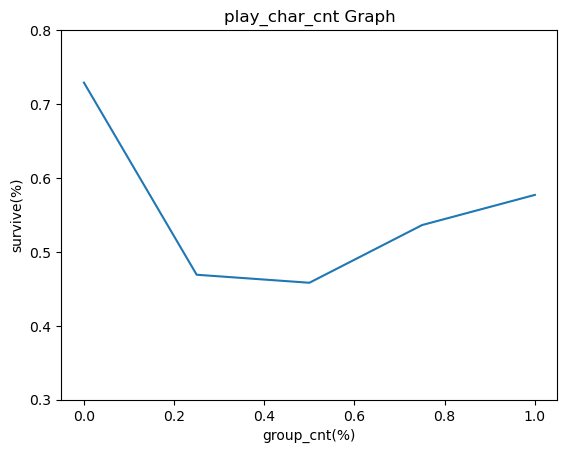

In [134]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 0.25, 0.50, 0.75, 1])
y = np.array([G0, G1, G2, G3, G4])

plt.plot(x, y)
plt.ylim([0.3, 0.8])
plt.ylabel('survive(%)')
plt.xlabel('group_cnt(%)')
plt.title('play_char_cnt Graph')
plt.show()

In [135]:
g00 = df1[(df1['combat_char_cnt'] == 0)]
g01 = df1[(df1['combat_char_cnt']>0) & (df1['combat_char_cnt'] <= 0.288715)]
g02 = df1[(df1['combat_char_cnt']>0.288715) & (df1['combat_char_cnt'] <= 6.135184)]
g03 = df1[(df1['combat_char_cnt']>6.135184) & (df1['combat_char_cnt'] <= 18.008570)]
g04 = df1[(df1['combat_char_cnt']>18.008570)]

In [136]:
G00 = g00[g00['survive']==1]['acc_id'].count()/(g00['acc_id'].count())
G01 = g01[g01['survive']==1]['acc_id'].count()/(g01['acc_id'].count())
G02 = g02[g02['survive']==1]['acc_id'].count()/(g02['acc_id'].count())
G03 = g03[g03['survive']==1]['acc_id'].count()/(g03['acc_id'].count())
G04 = g04[g04['survive']==1]['acc_id'].count()/(g04['acc_id'].count())

print('g00 생존율:', G00)
print('g04 생존율:', G01)
print('g01 생존율:', G02)
print('g02 생존율:', G03)
print('g03 생존율:', G04)



g00 생존율: 0.6477844914400805
g04 생존율: 0.5368620037807184
g01 생존율: 0.4786634460547504
g02 생존율: 0.5147573786893447
g03 생존율: 0.5807773004296134


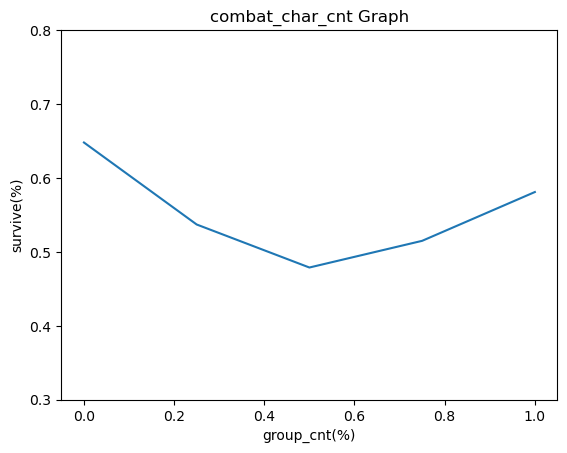

In [137]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 0.25, 0.50, 0.75, 1])
y = np.array([G00, G01, G02, G03, G04])

plt.plot(x, y)
plt.ylim([0.3, 0.8])
plt.ylabel('survive(%)')
plt.xlabel('group_cnt(%)')
plt.title('combat_char_cnt Graph')
plt.show()